In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/edb-313/Data_Science_salaries/main/Data/salaries_new_dataset.csv')

## EDA

#### Data Cleaning

In [2]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,CT,Finance Data Analyst,300000,EUR,322723,FR,100,US,M
1,2023,SE,FT,Data Engineer,146000,USD,146000,US,0,US,M
2,2023,SE,FT,Data Engineer,75000,USD,75000,US,0,US,M
3,2023,SE,FT,Data Engineer,146000,USD,146000,US,0,US,M
4,2023,SE,FT,Data Engineer,75000,USD,75000,US,0,US,M


Limitations of the dataset:
* Conversion to salary in usd done in different point in times -> subject to conversion rate fluctuations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979 entries, 0 to 3978
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3979 non-null   int64 
 1   experience_level    3979 non-null   object
 2   employment_type     3979 non-null   object
 3   job_title           3979 non-null   object
 4   salary              3979 non-null   int64 
 5   salary_currency     3979 non-null   object
 6   salary_in_usd       3979 non-null   int64 
 7   employee_residence  3979 non-null   object
 8   remote_ratio        3979 non-null   int64 
 9   company_location    3979 non-null   object
 10  company_size        3979 non-null   object
dtypes: int64(4), object(7)
memory usage: 342.1+ KB


* No null values
* Data types of each column in the dataset match the intended format.

In [4]:
#Only fulltime employees (FT)
df = df[df['employment_type']=='FT']

In [5]:
#Remove unneccesary columns
df = df.drop(['salary','salary_currency','employment_type'],axis = 1)

In [6]:
# define job groups
job_groups = {
    'Engineering': ['Data Engineer', 'Machine Learning Engineer', 'Data Specialist',
                    'Data Operations Analyst', 'Data Modeler', 'Analytics Engineer',
                    'BI Developer', 'ETL Engineer', 'Data DevOps Engineer',
                    'Big Data Engineer', 'BI Data Engineer', 'MLOps Engineer',
                    'Cloud Database Engineer', 'Data Infrastructure Engineer',
                    'Software Data Engineer', 'Data Operations Engineer', 'Cloud Data Engineer',
                    'ETL Developer', 'Cloud Data Architect'],
    'Analyst': ['Data Analyst', 'Business Data Analyst', 'Data Quality Analyst',
                'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst',
                'Data Analytics Specialist', 'Data Analytics Engineer',
                'Data Analytics Consultant', 'Finance Data Analyst'],
    'Leadership': ['Data Analytics Manager', 'Director of Data Science',
                   'Data Science Manager', 'Data Science Lead',
                   'Head of Data', 'Data Manager', 'Manager Data Management',
                   'Head of Data Science'],
    'Data Science': ['Research Scientist', 'Applied Scientist', 'Data Scientist',
                     'Machine Learning Scientist', 'AI Scientist', 'Decision Scientist',
                     'Applied Machine Learning Scientist', 'Principal Data Scientist',
                     'Applied Data Scientist', 'Staff Data Analyst', 'Insight Analyst',
                     'Data Science Engineer', 'Product Data Scientist'],
    'Big Data': ['Big Data Architect'],
    'Machine Learning': ['Machine Learning Research Engineer', 'Machine Learning Developer',
                         'Principal Machine Learning Engineer', 'Machine Learning Manager',
                         'Lead Machine Learning Engineer', 'Machine Learning Infrastructure Engineer'],
    'Deep learning': ['Deep Learning Researcher', '3D Computer Vision Researcher',
                      'Machine Learning Researcher', 'Computer Vision Software Engineer'],
    'Architecture': ['Data Architect', 'Principal Data Architect'],
    'Research': ['Research Engineer'],
    'Consulting': ['Data Science Consultant'],
    'NLP': ['NLP Engineer'],
    'Product': ['Product Data Analyst'],
    'ML OPS': ['MLOps Engineer'],
    'Visualization': ['Power BI Developer'],
    'Computer Vision': ['Autonomous Vehicle Technician']
}

# create a new column with job groups
for job_group, job_titles in job_groups.items():
    df.loc[df['job_title'].isin(job_titles), 'job_group'] = job_group

In [7]:
#Resetting the index
df = df.reset_index(drop=True)

#### Data Screening

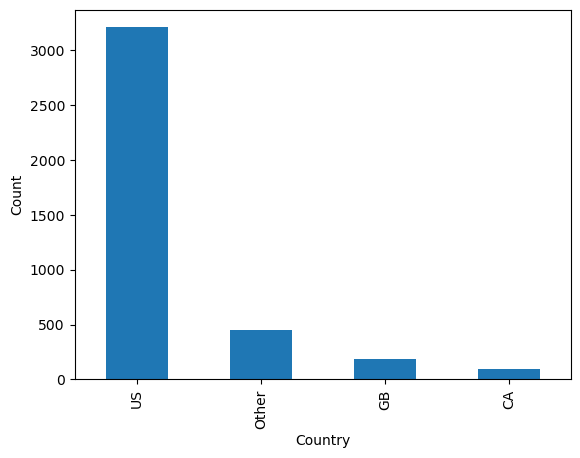

In [8]:
# Get the top 3 countries with highest number of jobs
top_countries = df['company_location'].value_counts().head(3).index.tolist()

# Create a new column called 'Country' with values either top country or other
df['Country'] = df['company_location'].apply(lambda x: x if x in top_countries else 'Other')

# Create a bar chart showing the number of jobs per country
ax = df['Country'].value_counts().plot(kind='bar')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.show()

* Data highly biased towards US job market

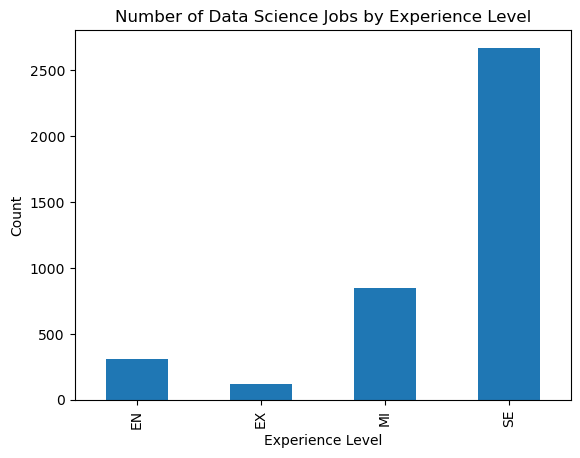

In [9]:
# Group the data by experience level and count the number of occurrences
exp_counts = df.groupby('experience_level')['job_title'].count()

# Create a bar plot
exp_counts.plot(kind='bar')

# Set the plot title and axes labels
plt.title('Number of Data Science Jobs by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')

# Show the plot
plt.show()

*  Data highly biased towards SE experience level

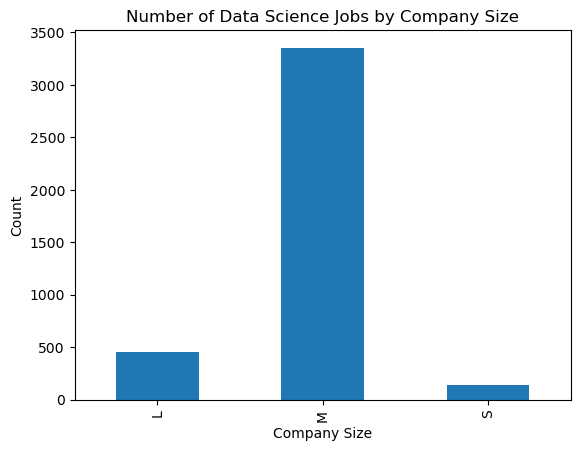

In [10]:
# Group the data by experience level and count the number of occurrences
exp_counts = df.groupby('company_size')['job_title'].count()

# Create a bar plot
exp_counts.plot(kind='bar')

# Set the plot title and axes labels
plt.title('Number of Data Science Jobs by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')

# Show the plot
plt.show()

*  Data highly biased towards companies of M size

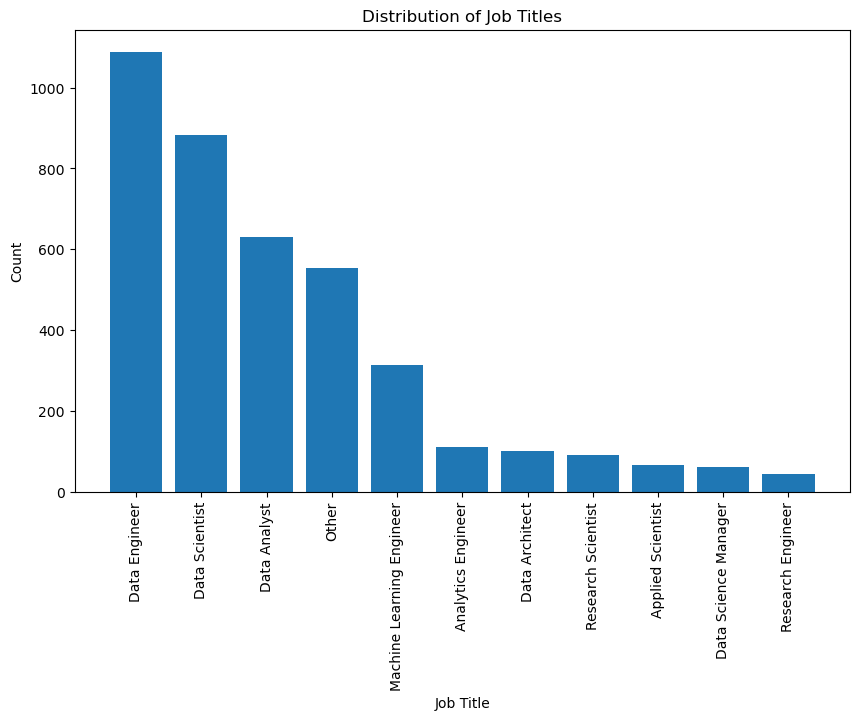

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 job titles by count
top_job_titles = df['job_title'].value_counts().nlargest(10).index

# Create a new column 'job_title_grouped' with top job titles and 'Other' for all other job titles
df['job_title_grouped'] = df['job_title'].apply(lambda x: x if x in top_job_titles else 'Other')

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(df['job_title_grouped'].value_counts().index, df['job_title_grouped'].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Distribution of Job Titles')
plt.show()

# Drop the 'job_title_grouped' column if it's not needed anymore
df.drop('job_title_grouped', axis=1, inplace=True)


* More than 60% of our dataset has as job title: Data Engineer, Data Scientist or Data Analyst

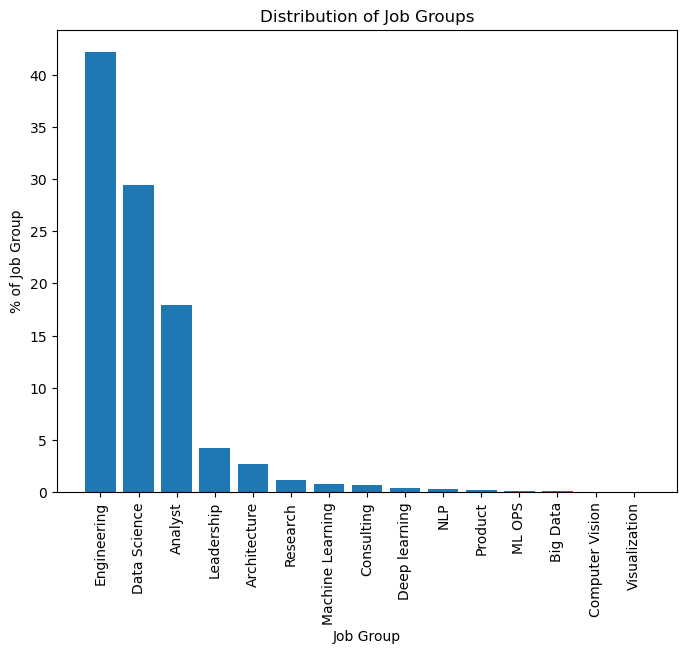

In [12]:
# Calculate percentage over total
job_group_counts = df['job_group'].value_counts(normalize=True) * 100

# Create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(job_group_counts.index, job_group_counts.values)

# Add labels and title
ax.set_xlabel('Job Group')
ax.set_ylabel('% of Job Group')
ax.set_title('Distribution of Job Groups')
plt.xticks(rotation=90)

# Display the plot
plt.show()


* Even when dividing in Job Group there is bias

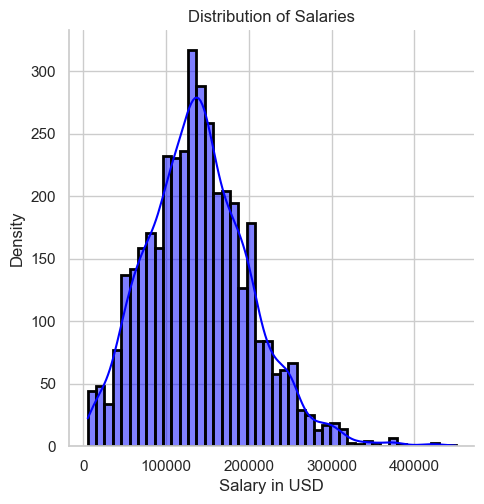

In [13]:
sns.set(style="whitegrid") # set the style for seaborn plots

# create the displot
sns.displot(df['salary_in_usd'], kde=True, color='blue', 
            edgecolor='black', linewidth=2)

# add labels and title
plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.title('Distribution of Salaries')

# display the plot and save it
plt.show()


* Dataset is approximately normally distributed

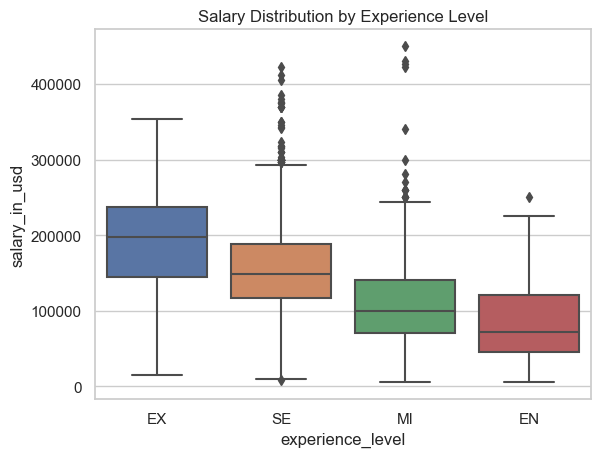

In [64]:
# Define the order of experience_level
order = ['EX', 'SE', 'MI', 'EN']

# Create a box plot of salary_in_usd by experience_level
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=order)

# Set the title of the plot
plt.title('Salary Distribution by Experience Level')

# Show the plot
plt.show()


* Dataset's outliers are mainly in experience level SE and MI
* As expected, mean salary decreases (linearly) by experience level

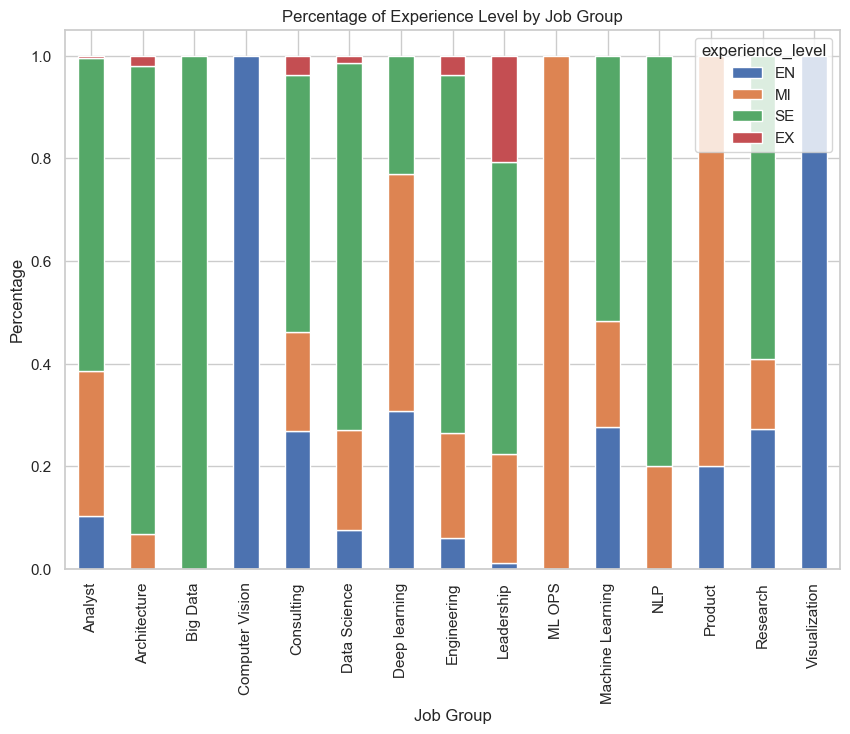

In [149]:
# calculate percentage of each experience level by job group
grouped = df.groupby('job_group')['experience_level'].value_counts(normalize=True).unstack().fillna(0)

# reorder columns
grouped = grouped[['EN', 'MI', 'SE', 'EX']]

# create stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 7))
ax.set_xlabel('Job Group')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Experience Level by Job Group')
plt.show()

## Data Visualizations

##### 1. Rank in descending order the average salary by country (regardless of job title and experience level)

To obtain a meaningful result, we will only consider countries that have more than 50 data points.

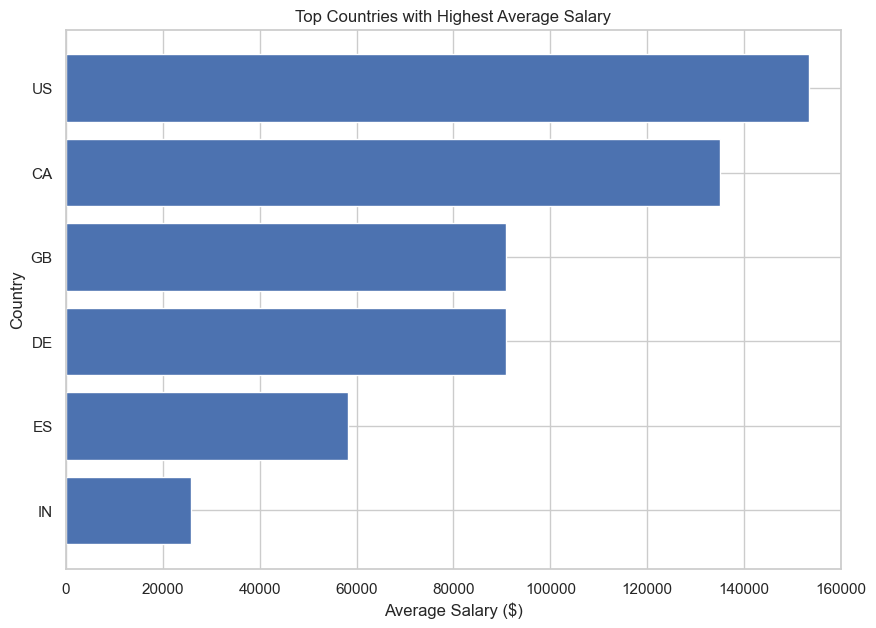

In [69]:
country_counts = df['company_location'].value_counts()

# Filter the dataframe to keep only meaningfull rows
df_country_count = df[df['company_location'].isin(country_counts[country_counts >= 50].index)]

# Calculate the average salary by country and sort in descending order
avg_salary_country = df_country_count.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(avg_salary_country.index, avg_salary_country.values)

# Set the titles
ax.set_xlabel('Average Salary ($)')
ax.set_ylabel('Country')
ax.set_title('Top Countries with Highest Average Salary')

# Set the x-axis range
ax.set_xlim(0, 160000)

#Display the plot
plt.show()

##### 2.1. Rank in descending order the average salary by Job Title

To obtain a meaningful result, we will only consider job titles that have more than 50 data points.

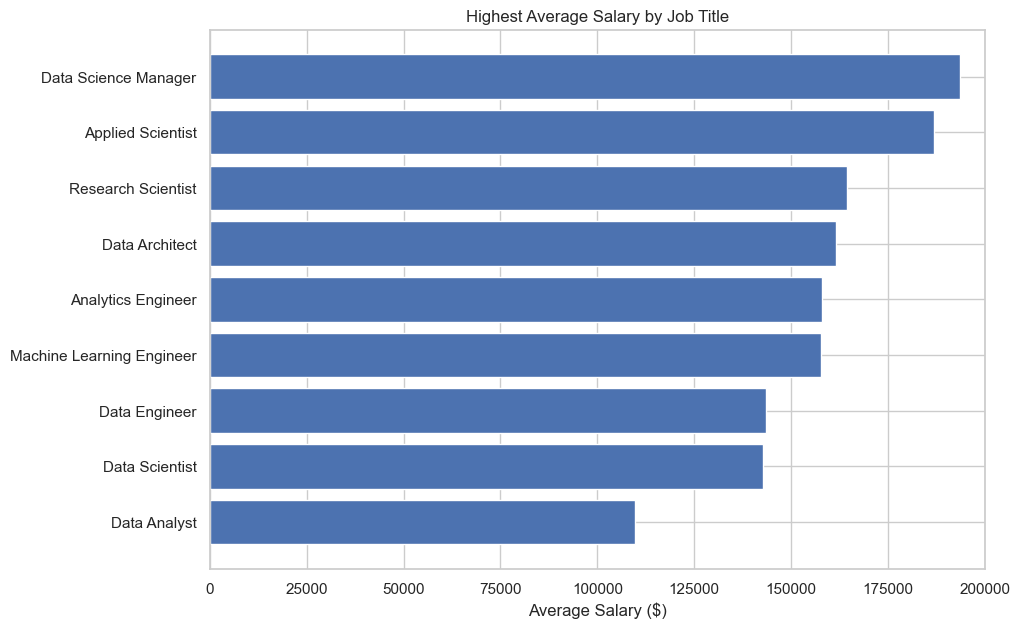

In [58]:
titles_count = df['job_title'].value_counts()

# Filter the dataframe to keep only meaningfull rows
df_titles_count = df[df['job_title'].isin(titles_count[titles_count >= 50].index)]

#Calcualte average salary by title
avg_salary_title = df_titles_count.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(top_10_titles.index, top_10_titles.values)

# Set the x-axis range and label
ax.set_xlabel('Average Salary ($)')
ax.set_xlim(0, 200000)

# Set the title
ax.set_title('Highest Average Salary by Job Title')

#Display the graph
plt.show()

##### 2.2. Rank in descending order the average salary by Job Group

To obtain a meaningful result, we will only consider job titles that have more than 50 data points.

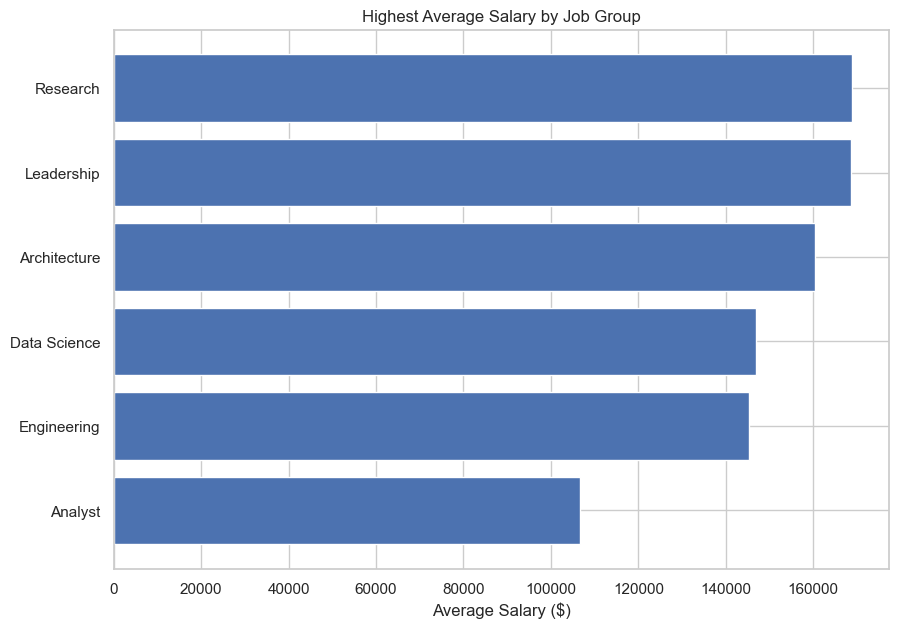

In [61]:
group_count = df['job_group'].value_counts()

# Filter the dataframe to keep only meaningfull rows
df_group_count = df[df['job_group'].isin(group_count[group_count >= 40].index)]

#Calcualte average salary by job group
avg_salary_group = df_group_count.groupby('job_group')['salary_in_usd'].mean().sort_values(ascending=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(avg_salary_group.index, avg_salary_group.values)

# Set the titles
ax.set_xlabel('Average Salary ($)')
ax.set_title('Highest Average Salary by Job Group')

#Display the graph
plt.show()

##### 3. Does the company size affect the average salary?

In [65]:
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size_num'] = df['company_size'].map(size_mapping)

In [66]:
# Calculate the correlation coefficient between company size and salary
correlation = df['company_size_num'].corr(df['salary_in_usd'])

print('Correlation between company size and salary:', round(correlation,3))

Correlation between company size and salary: -0.01


A correlation coefficient of -0.01 between company size and salary indicates a very weak negative correlation between the two variables. Therefore, we can conclude that there is no strong linear relationship between company size and salary in the dataset. In conclusion, the company size doesn't affect the average salary.

##### 4. Of the companies that employee AI, ML, Data Science and Big Data personnel, what percentage are small, medium, and large?

In [68]:
# Count the number of companies in each size category
size_counts = df['company_size'].value_counts()

# Calculate the total number of companies
total_companies = size_counts.sum()

# Calculate the percentage of companies in each size category
percent_small = size_counts['S'] / total_companies * 100
percent_medium = size_counts['M'] / total_companies * 100
percent_large = size_counts['L'] / total_companies * 100

# Round the percentages to two decimal places and add the percent sign
percent_small_formatted = '{:.2f}%'.format(round(percent_small, 2))
percent_medium_formatted = '{:.2f}%'.format(round(percent_medium, 2))
percent_large_formatted = '{:.2f}%'.format(round(percent_large, 2))

# Print the results
print('Percentage of companies that are small:', percent_small_formatted)
print('Percentage of companies that are medium:', percent_medium_formatted)
print('Percentage of companies that are large:', percent_large_formatted)

Percentage of companies that are small: 3.45%
Percentage of companies that are medium: 85.11%
Percentage of companies that are large: 11.44%


(?) We can make and educated guess that larger companies are more likely to hire for AI, ML, Data Science and Big Data personnel.

##### 5.1. Rank in descending order the remote work ratio by job title

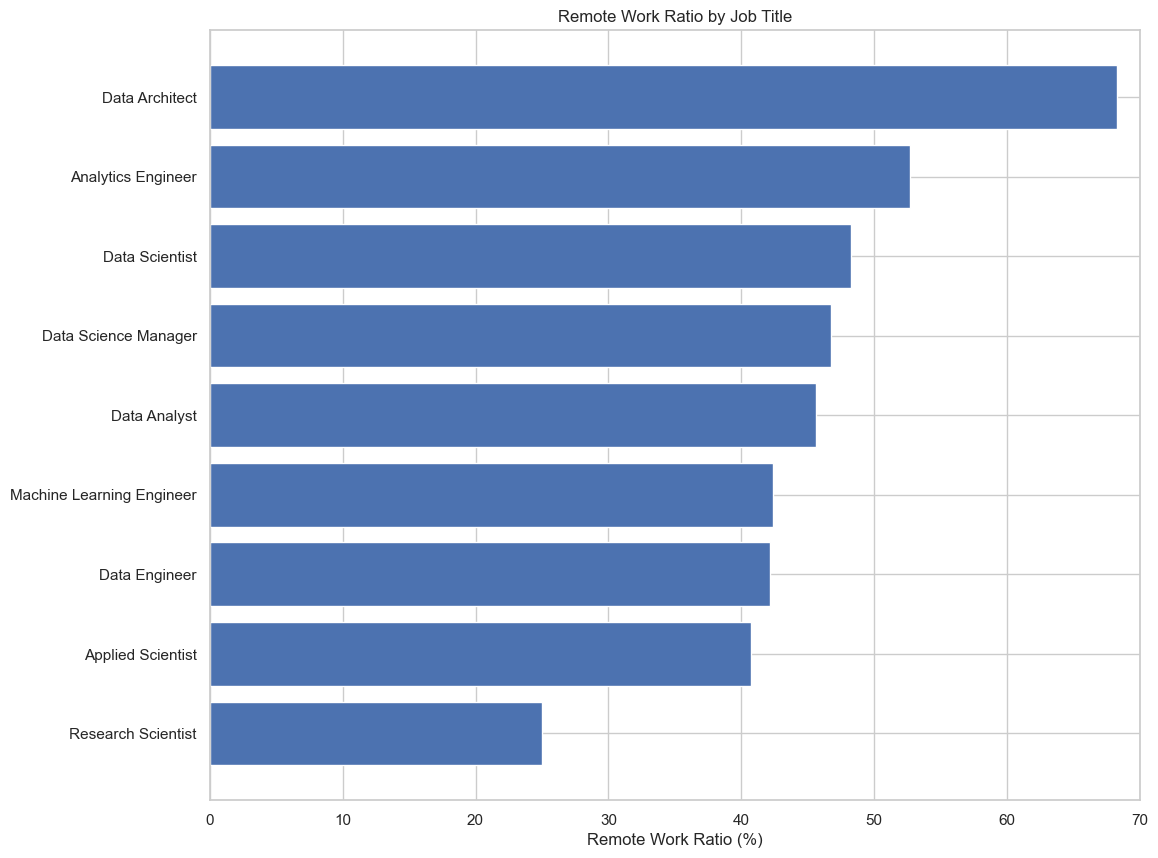

In [73]:
# Calculate the mean remote work ratio by job title
remote_work_ratio = df_titles_count.groupby('job_title')['remote_ratio'].mean()

# Sort the results in descending order
remote_work_ratio_sorted = remote_work_ratio.sort_values(ascending=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(remote_work_ratio_sorted.index, remote_work_ratio_sorted)

# Set the title, labels and range
ax.set_title('Remote Work Ratio by Job Title')
ax.set_xlabel('Remote Work Ratio (%)')
ax.set_xlim(0, 70)

#Display the graph
plt.show()

##### 5.2. Rank in descending order the remote work ratio by job group

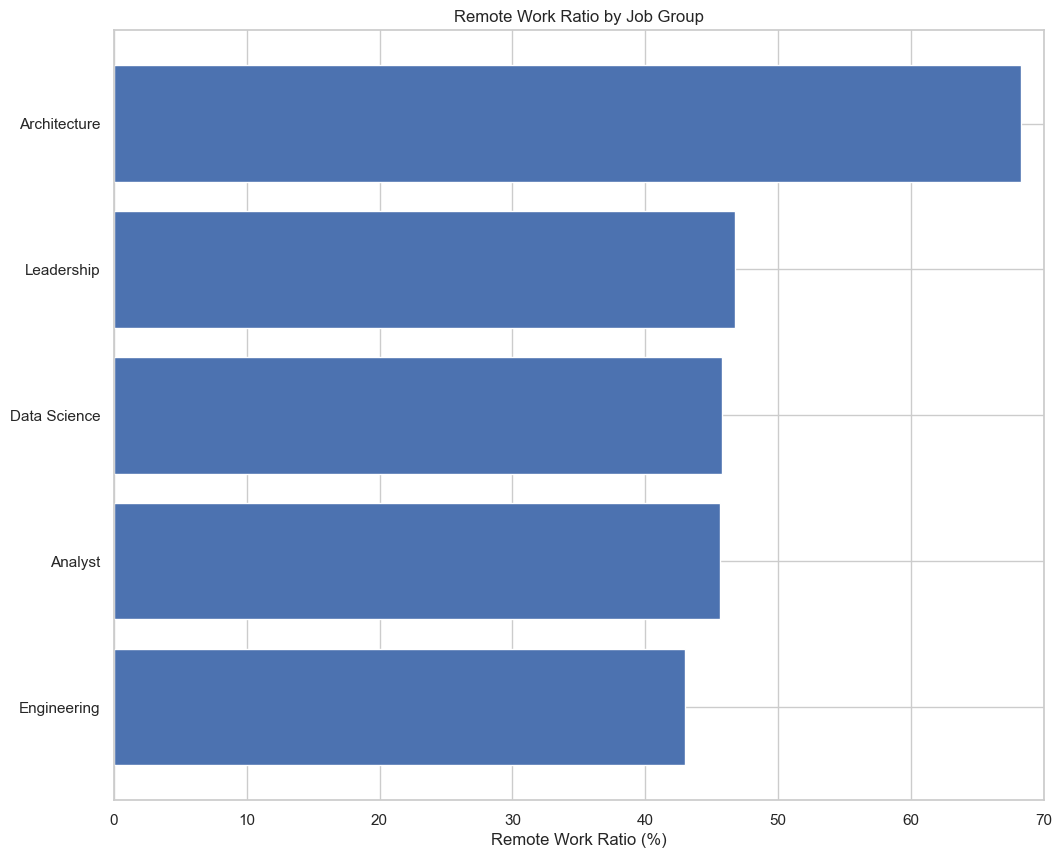

In [125]:
# Calculate the mean remote work ratio by job title
remote_work_ratio = df_titles_count.groupby('job_group')['remote_ratio'].mean()

# Sort the results in descending order
remote_work_ratio_sorted = remote_work_ratio.sort_values(ascending=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(remote_work_ratio_sorted.index, remote_work_ratio_sorted)

# Set the title, labels and range
ax.set_title('Remote Work Ratio by Job Group')
ax.set_xlabel('Remote Work Ratio (%)')
ax.set_xlim(0, 70)

#Display the graph
plt.show()

##### 6. Rank in descending order the remote work ratio by company size

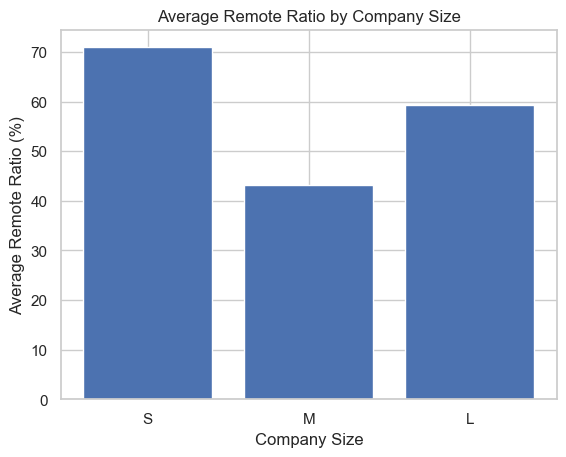

In [83]:
# group the data by company size and calculate the mean of remote_ratio for each group
remote_by_size = df.groupby('company_size')['remote_ratio'].mean()

# order the groups by size
remote_by_size = remote_by_size.reindex(['S', 'M', 'L'])

# create a bar chart
plt.bar(remote_by_size.index, remote_by_size.values)

# add x-axis and y-axis labels and title
plt.xlabel('Company Size')
plt.ylabel('Average Remote Ratio (%)')
plt.title('Average Remote Ratio by Company Size')

# display the plot
plt.show()


##### 7.1. What is the trend in average salaries over time?

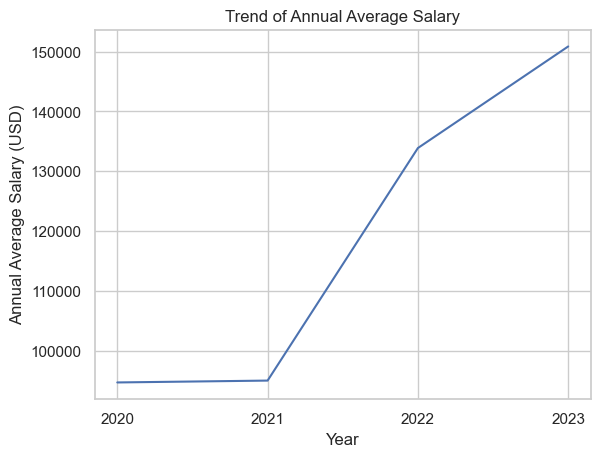

In [102]:
# Convert the 'work_year' column to a datetime object
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

# Calculate the annual average salary in USD
annual_avg_salary = df.groupby(df['work_year'].dt.year)['salary_in_usd'].mean()

# Format the yearly dates
yearly_dates = [pd.Period(year=year, freq='A') for year in annual_avg_salary.index]
yearly_dates_formatted = [date.strftime('%Y') for date in yearly_dates]

# Plot the trend of annual average salary
plt.plot(yearly_dates_formatted, annual_avg_salary.values)

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Annual Average Salary (USD)')
plt.title('Trend of Annual Average Salary')

# Show the plot
plt.show()

##### 7.1. What is the trend of the remote ratio over time?

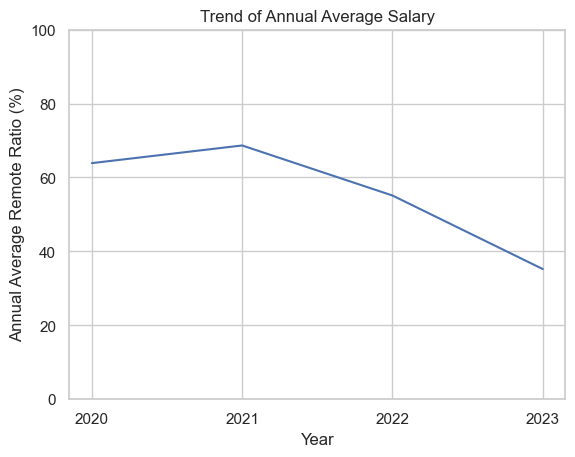

In [103]:
# Calculate the annual average salary in USD
annual_avg_remote = df.groupby(df['work_year'].dt.year)['remote_ratio'].mean()

# Format the yearly dates
yearly_dates = [pd.Period(year=year, freq='A') for year in annual_avg_salary.index]
yearly_dates_formatted = [date.strftime('%Y') for date in yearly_dates]

# Plot the trend of annual average salary
plt.plot(yearly_dates_formatted, annual_avg_remote.values)

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Annual Average Remote Ratio (%)')
plt.title('Trend of Annual Average Salary')
plt.ylim(0, 100)

# Show the plot
plt.show()

##### 8.1. Which Job Title has seen the highest salary increase YoY?

In [137]:
# Group the data by job_title and year, and calculate the average salary for each group
avg_salary_by_job_year = df_titles_count.groupby(['job_title', df['work_year'].dt.year])['salary_in_usd'].mean()

# Calculate the YoY percentage change for each job_title
yoy_salary_change_by_job = avg_salary_by_job_year.groupby('job_title').pct_change(periods=1)
yoy_salary_change_by_job.dropna(inplace=True)

# Find the job_title with the highest YoY percentage change
highest_yoy_jobs = yoy_salary_change_by_job.groupby('job_title').mean()
highest_yoy_jobs_sorted = highest_yoy_jobs.sort_values(ascending=False)
highest_yoy_jobs_sorted = highest_yoy_jobs_sorted * 100
highest_yoy_jobs_sorted = highest_yoy_jobs_sorted.round(2).astype(str) + '%'

# Print the result
highest_yoy_jobs_sorted

job_title
Data Analyst                 42.51%
Data Scientist               28.17%
Data Engineer                26.91%
Analytics Engineer           25.41%
Machine Learning Engineer    21.95%
Research Scientist           10.56%
Data Science Manager          5.86%
Applied Scientist            -1.07%
Data Architect               -2.74%
Name: salary_in_usd, dtype: object

##### 8.2. Which Job Group has seen the highest salary increase YoY?

In [138]:
# Group the data by job_group and year, and calculate the average salary for each group
avg_salary_by_group_year = df_group_count.groupby(['job_group', df['work_year'].dt.year])['salary_in_usd'].mean()

# Calculate the YoY percentage change for each job_group
yoy_salary_change_by_group = avg_salary_by_group_year.groupby('job_group').pct_change(periods=1)
yoy_salary_change_by_group.dropna(inplace=True)

# Find the job_group with the highest YoY percentage change
highest_yoy_group = yoy_salary_change_by_group.groupby('job_group').mean()
highest_yoy_group_sorted = highest_yoy_group.sort_values(ascending=False)
highest_yoy_group_sorted = highest_yoy_group_sorted * 100
highest_yoy_group_sorted = highest_yoy_group_sorted.round(2).astype(str) + '%'

# Print the result
highest_yoy_group_sorted

job_group
Analyst          21.89%
Engineering      21.88%
Data Science     18.93%
Architecture     -2.77%
Leadership       -8.84%
Research        -13.28%
Name: salary_in_usd, dtype: object

##### 9.1. For each job title, how does the average salary vary depending on experience level?

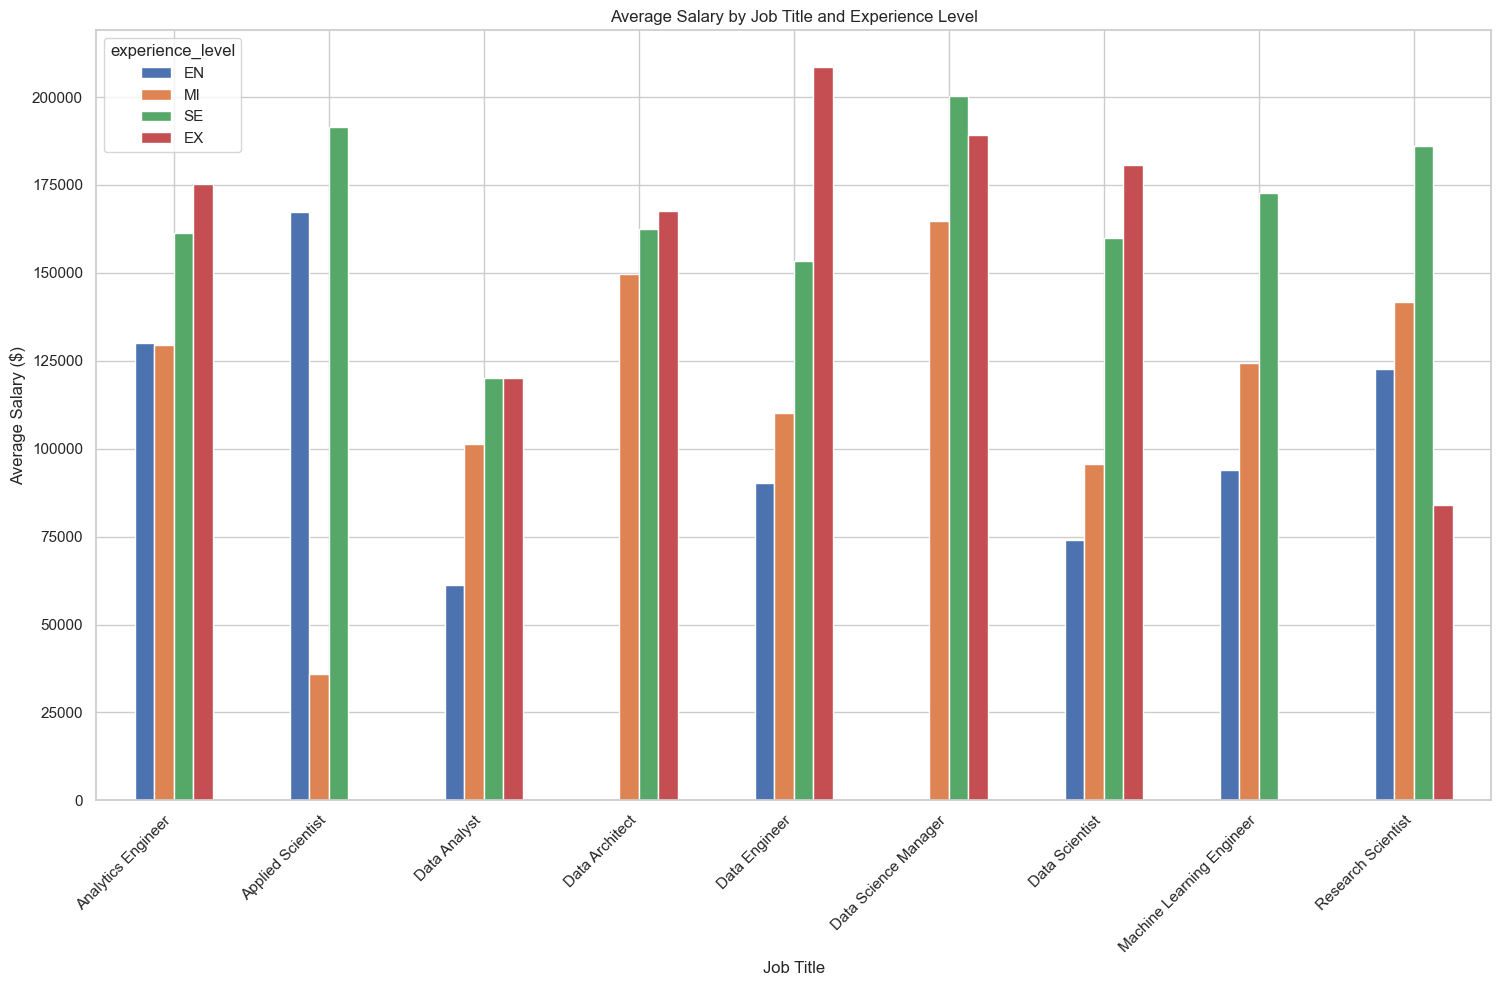

In [155]:
avg_salary_by_job_exp = df_titles_count.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean()
avg_salary_by_job_exp.dropna(inplace=True)

# Reset index to make job_title a regular column
avg_salary_by_job_exp = avg_salary_by_job_exp.reset_index()

# Pivot the table to prepare for plotting
pivoted_data = avg_salary_by_job_exp.pivot(index='job_title', columns='experience_level', values='salary_in_usd')

# Reorder the columns
pivoted_data = pivoted_data[['EN', 'MI', 'SE', 'EX']] 

# Plot a stacked bar chart
pivoted_data.plot(kind='bar', figsize=(18,10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Title')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Job Title and Experience Level')
plt.show()

##### 9.1. For each job group, how does the average salary vary depending on experience level?

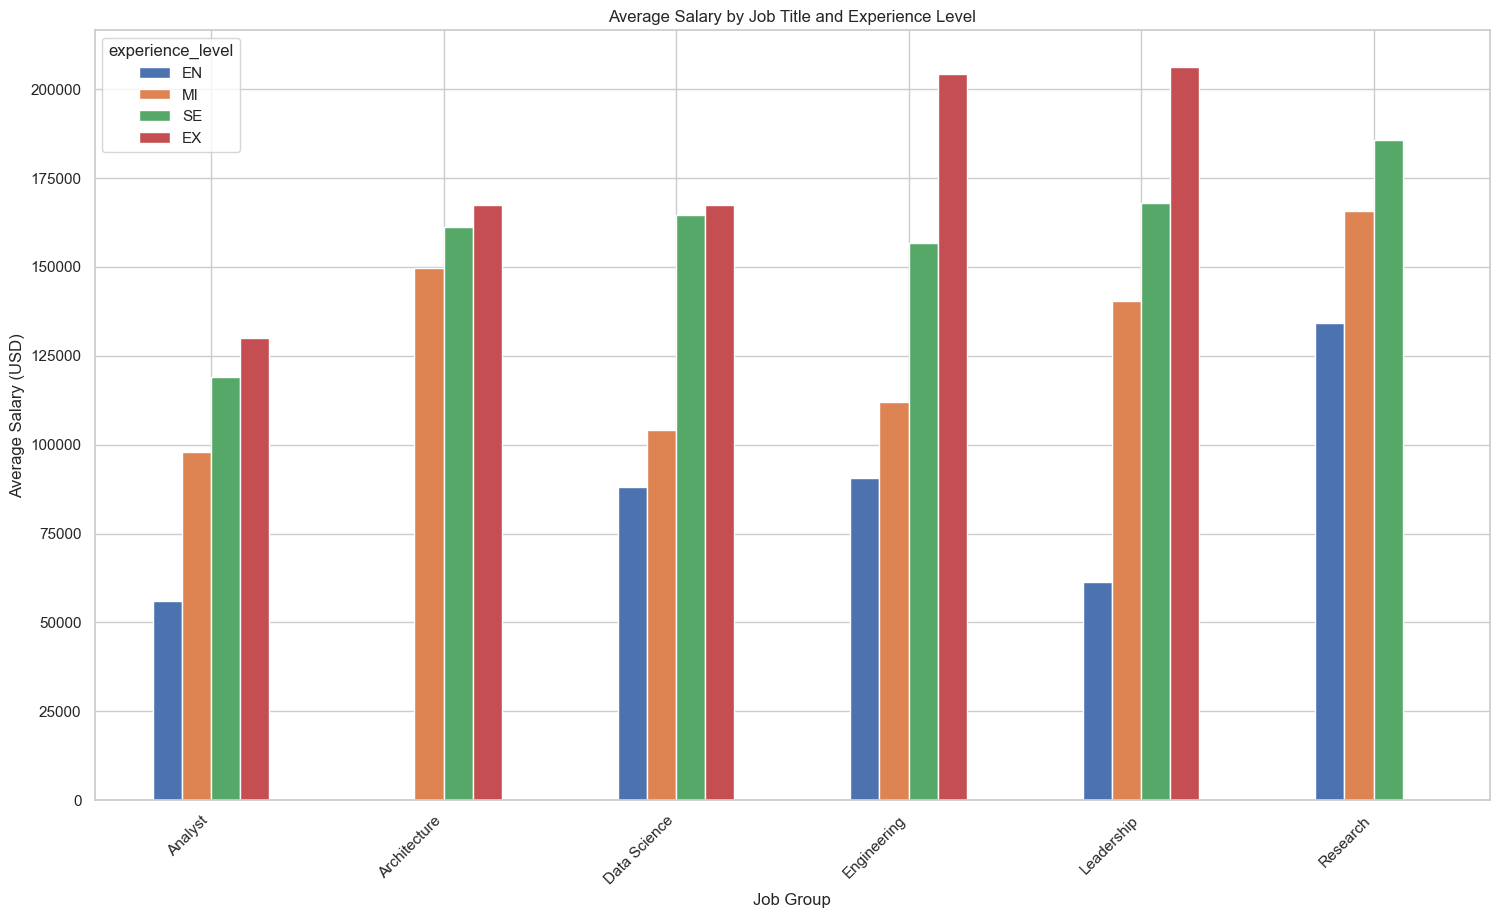

In [157]:
avg_salary_by_group_exp = df_group_count.groupby(['job_group', 'experience_level'])['salary_in_usd'].mean()
avg_salary_by_group_exp.dropna(inplace=True)

# Reset index to make job_title a regular column
avg_salary_by_group_exp = avg_salary_by_group_exp.reset_index()

# Pivot the table to prepare for plotting
pivoted_data = avg_salary_by_group_exp.pivot(index='job_group', columns='experience_level', values='salary_in_usd')

# Reorder the columns
pivoted_data = pivoted_data[['EN', 'MI', 'SE', 'EX']] 

# Plot a stacked bar chart
pivoted_data.plot(kind='bar', figsize=(18,10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Group')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Job Title and Experience Level')

#Display the chart
plt.show()